#### How many basic operations are required for a matrix multiplication?

* there are $i\cdot j$ entries in the resulting matrix
* for each entry there are $k$ terms we need to add to the result of this entry (1 addition) and to compute what to add we need to compute $A_{ik}B_{kj}$ (1 multiplication)
* $2k$ basic operations for each entry and $i\cdot j$ entries
* $2ijk$ operations per matrix multiplication

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def nonfancy_matrix_mult(A,B): # A_col = B_row
    A_row,A_col = np.shape(A)
    B_row,B_col = np.shape(B)
    result = np.zeros((A_row,B_col))
    N_operations = 0
    for i in range(A_row):
        for j in range(B_col):
            val = 0
            for k in range(A_col):
                val += A[i,k] * B[k,j]
                N_operations += 2
            result[i,j] = val
    return result,N_operations

In [3]:
A = np.random.rand(3,4)
B = np.random.rand(4,5)

M,N_op = nonfancy_matrix_mult(A,B)
print(f"A:\n{A}")
print(f"B:\n{B}")
print(f"AB:\n{M}\n")
print("Number of operations: "+ str(N_op))
print("Non-fancy MatMul correct? "+ str(np.allclose(M,np.matmul(A,B))))

A:
[[0.99485086 0.90509542 0.46159125 0.43923711]
 [0.96976811 0.93163569 0.94475187 0.71932111]
 [0.19273011 0.5207397  0.35216299 0.52288241]]
B:
[[0.49793136 0.58437948 0.4933254  0.40719568 0.81942525]
 [0.22691941 0.60364095 0.82317781 0.30509915 0.04235396]
 [0.61945558 0.54243773 0.27980659 0.93561368 0.90417866]
 [0.29116515 0.07488066 0.93305457 0.46396216 0.76146141]]
AB:
[[1.11457698 1.41099797 1.77482813 1.3169033  1.60536335]
 [1.48895723 1.69541834 2.18082672 1.8967872  2.23607068]
 [0.58452678 0.65714761 1.11015537 0.80944227 0.89655635]]

Number of operations: 120
Non-fancy MatMul correct? True


In [4]:
A = np.random.rand(100,200)
B = np.random.rand(50,100)
C = np.random.rand(2,50)

BA,n1 = nonfancy_matrix_mult(B,A)
C_BA,num_C_BA = nonfancy_matrix_mult(C,BA)
print("Num C(BA): ",n1+num_C_BA)
CB,n2 = nonfancy_matrix_mult(C,B)
CB_A,num_CB_A = nonfancy_matrix_mult(CB,A)
print("Num (CB)A: ",n2+num_CB_A)
print("Same matrix: " + str(np.allclose(C_BA,CB_A)))
print("Ratio: ", (n1+num_C_BA)/(n2+num_CB_A))

Num C(BA):  2040000
Num (CB)A:  100000
Same matrix: True
Ratio:  20.4


In [5]:
A = np.random.rand(300,2)
B = np.random.rand(500,300)
C = np.random.rand(1000,500)

BA,n1 = nonfancy_matrix_mult(B,A)
C_BA,num_C_BA = nonfancy_matrix_mult(C,BA)
print("Num C(BA): ",n1+num_C_BA)
CB,n2 = nonfancy_matrix_mult(C,B)
CB_A,num_CB_A = nonfancy_matrix_mult(CB,A)
print("Num (CB)A: ",n2+num_CB_A)
print("Same matrix: " + str(np.allclose(C_BA,CB_A)))
print("Ratio: ", (n1+num_C_BA)/(n2+num_CB_A))

Num C(BA):  2600000
Num (CB)A:  301200000
Same matrix: True
Ratio:  0.008632138114209827


In [6]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.3922, 0.7640, 0.8401],
        [0.2475, 0.2525, 0.2367],
        [0.4729, 0.6484, 0.2353],
        [0.5705, 0.6264, 0.1841],
        [0.8914, 0.4150, 0.3893]])


In [7]:
def func(x):
    x1,x2,x3 = x
    z1 = 2*x1*x2
    z2 = x3**2
    return torch.stack([z1,z2])

* What is the Jacobian of this function $\frac{\partial z_i}{\partial x_i}$?
* What does the Jacobian look like at the input `X = [2.,3.,2.]` ?

$$J = \left(\begin{array}{}
  2x_2 & 2x_1 & 0\\
  0 & 0 & 2x_3\\
\end{array}\right)$$

At `x = [2.,3.,2.]`

$$J = \left(\begin{array}{}
  6 & 4 & 0\\
  0 & 0 & 4\\
\end{array}\right)$$

In [11]:
x = torch.tensor([2.,3.,2.])
val1, jac_col1 = torch.func.jvp(func, (x,), (torch.tensor([1.,0.,0.]),))
val2, jac_col2 = torch.func.jvp(func, (x,), (torch.tensor([0.,1.,0.]),))
val3, jac_col3 = torch.func.jvp(func, (x,), (torch.tensor([0.,0.,1.]),))

print(np.column_stack([jac_col1,jac_col2,jac_col3]))

[[6. 4. 0.]
 [0. 0. 4.]]


In [12]:
value, vjp_func = torch.func.vjp(func,x)
print(vjp_func(torch.tensor([1.,0.])))
print(vjp_func(torch.tensor([0.,1.])))

(tensor([6., 4., 0.]),)
(tensor([0., 0., 4.]),)


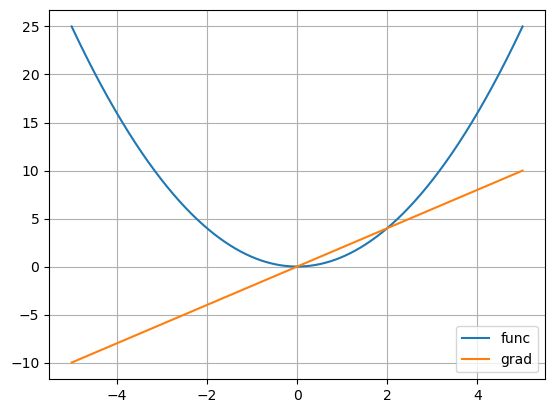

In [34]:
def myfunc1(x):
    return x**2

xi = np.linspace(-5.,5.,1001)
yi = myfunc1(xi)
gi = np.gradient(yi,xi)
plt.figure()
plt.plot(xi,yi, label = 'func')
plt.plot(xi,gi, label = 'grad')
plt.grid()
plt.legend()
plt.show()

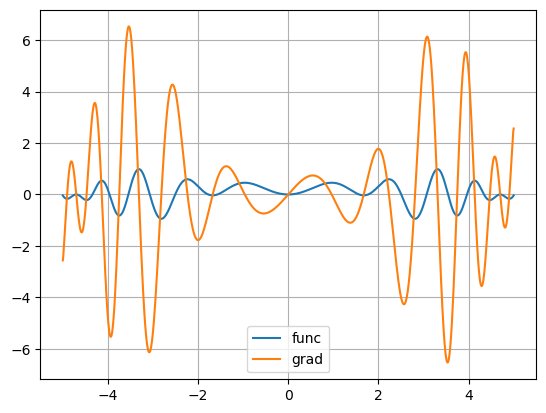

In [36]:
def myfunc2(x):
    x = torch.tensor(x)
    return torch.sin(x**2)*torch.cos(x)

xi = np.linspace(-5.,5.,1001)
yi = myfunc2(xi)
gi = np.gradient(yi,xi)
plt.figure()
plt.plot(xi,yi, label = 'func')
plt.plot(xi,gi, label = 'grad')
plt.grid()
plt.legend()
plt.show()